# TensorFlow

[Датасет можно скачать здесь](https://www.kaggle.com/ligtfeather/football-vs-rugby-image-classification)

In [ ]:
!pip install saliency tensorflow

     |████████████████████████████████| 77 kB 947 kB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.18.0 requires tensorflow-io-gcs-filesystem==0.18.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.8.3 requires cupy-cuda114, which is not installed.
cudf 21.8.3 requires cupy-cuda110, which is not installed.
beatrix-jupyterlab 3.1.1 requires google-cloud-bigquery-storage, which is not installed.
tensorflow-transform 1.3.0 requires absl-

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# setting the image size
inp_img_w = 224
inp_img_h = 224

In [ ]:
train_dir = "./data/train/"
test_dir = "./data/test/"

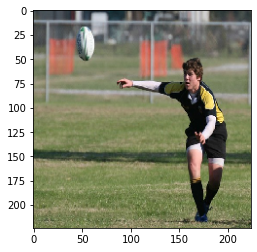

In [ ]:
img = image.load_img("./data/train/rugby/rugby.1,001.jpg", target_size=(inp_img_h, inp_img_w)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    directory=train_dir, 
    target_size=(inp_img_h, inp_img_w),
    batch_size=batch_size,
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_dir, 
    target_size=(inp_img_h, inp_img_w),
    batch_size=batch_size,
    subset='validation',
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir, 
    target_size=(inp_img_h, inp_img_w),
    batch_size=1,
    shuffle=False,
    seed=42
)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 1960 images belonging to 2 classes.
Found 488 images belonging to 2 classes.
Found 610 images belonging to 2 classes.
data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 2)


In [ ]:
def get_model(path=None):
    if path:
        model = load_model(path)
        return model
    conv_base = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(inp_img_h, inp_img_w, 3),
                      classes=2)
    model = tf.keras.models.Sequential()
    for layer in conv_base.layers:
        model.add(layer)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(2, activation="softmax"))
    return model


model = get_model(path='final_model_v2.h5')

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=0.000001),
              metrics=['accuracy'])

In [ ]:
epochs = 70

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
) 

2021-11-25 07:29:49.961243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/70


2021-11-25 07:29:52.880625: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


62/62 [==============================] - 91s 1s/step - loss: 0.8778 - accuracy: 0.4913 - val_loss: 0.6819 - val_accuracy: 0.5615
Epoch 2/70
62/62 [==============================] - 54s 864ms/step - loss: 0.7288 - accuracy: 0.5515 - val_loss: 0.6256 - val_accuracy: 0.6844
Epoch 3/70
62/62 [==============================] - 54s 866ms/step - loss: 0.6656 - accuracy: 0.6255 - val_loss: 0.5979 - val_accuracy: 0.7029
Epoch 4/70
62/62 [==============================] - 54s 870ms/step - loss: 0.6384 - accuracy: 0.6531 - val_loss: 0.5724 - val_accuracy: 0.6885
Epoch 5/70
62/62 [==============================] - 54s 876ms/step - loss: 0.6027 - accuracy: 0.6679 - val_loss: 0.5352 - val_accuracy: 0.7480
Epoch 6/70
62/62 [==============================] - 54s 870ms/step - loss: 0.6005 - accuracy: 0.6724 - val_loss: 0.5092 - val_accuracy: 0.7848
Epoch 7/70
62/62 [==============================] - 53s 858ms/step - loss: 0.5824 - accuracy: 0.6964 - val_loss: 0.5019 - val_accuracy: 0.7746
Epoch 8/70
62

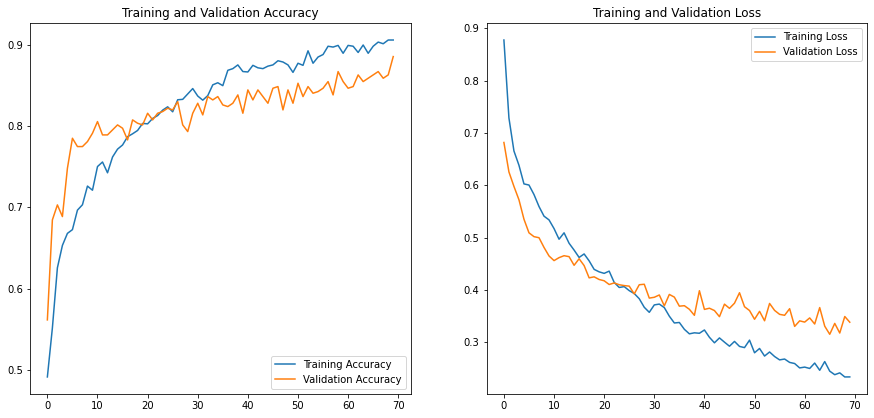

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('final_model.h5', save_format='h5')

## 1. Обучить одну модель. И найти:
* 2 примера правильно классифицированных с высокой вероятностью принадлежности к классу  
* 2 примера правильно классифицированных с низкой вероятностью принадлежности к классу  
* 2 примера неправильно классифицированных с высокой (с максимально возможной) вероятностью принадлежности к классу  
* 2 примера неправильно классифицированных с низкой вероятностью принадлежности к классу  
Примеры брать из тестового набора данных.

In [ ]:
predictions = model.predict(test_generator)
predicted_class = np.array([np.argmax(prediction) for prediction in predictions])
preds = np.array([1 - np.max(prediction) if np.argmax(prediction) == 0 else np.max(prediction) for prediction in predictions])
labels = test_generator.labels

### 1.1. 2 примера правильно классифицированных с высокой вероятностью принадлежности к классу

In [ ]:
first_class_right_cls_high_prob_idx, second_class_right_cls_high_prob_idx = np.argmin(preds), np.argmax(preds)
print(f"prob = {np.min(preds)}, pred_class = {predicted_class[first_class_right_cls_high_prob_idx]}, true_class = {labels[first_class_right_cls_high_prob_idx]}")
print(f"prob = {np.max(preds)}, pred_class = {predicted_class[second_class_right_cls_high_prob_idx]}, true_class = {labels[second_class_right_cls_high_prob_idx]}")

prob = 5.960464477539062e-07, pred_class = 0, true_class = 0
prob = 0.9998629093170166, pred_class = 1, true_class = 1


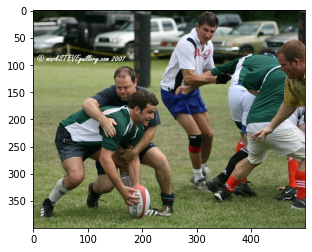

In [ ]:
img_path = test_generator.filepaths[first_class_right_cls_high_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

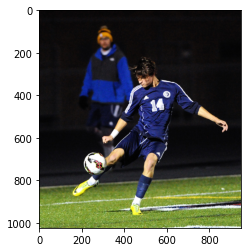

In [ ]:
img_path = test_generator.filepaths[second_class_right_cls_high_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

### 1.2. 2 примера правильно классифицированных с низкой вероятностью принадлежности к классу

In [ ]:
arr = sorted(zip(list(range(len(labels))), preds, predicted_class, labels), key=lambda x: x[1])
for i in range(len(arr) - 1, -1, -1):
    idx, prob, pred_label, true_label = arr[i]
    if pred_label == true_label == 0:
        first_class_right_cls_low_prob_idx = idx
        print(f"prob = {prob}, pred_class = {pred_label}, true_class = {labels[first_class_right_cls_low_prob_idx]}")
        break
for i in range(len(arr)):
    idx, prob, pred_label, true_label = arr[i]
    if pred_label == 1 and true_label == 1:
        second_class_right_cls_low_prob_idx = idx
        print(f"prob = {prob}, pred_class = {pred_label}, true_class = {labels[second_class_right_cls_low_prob_idx]}")
        break

prob = 0.4678492546081543, pred_class = 0, true_class = 0
prob = 0.5008545517921448, pred_class = 1, true_class = 1


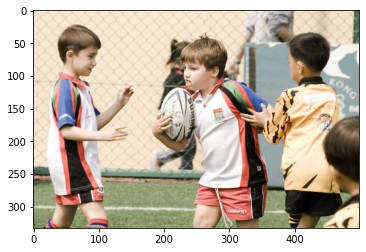

In [ ]:
img_path = test_generator.filepaths[first_class_right_cls_low_prob_idx]
# img = image.load_img(img_path, target_size=(inp_img_h, inp_img_w)) 
img = image.load_img(img_path)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

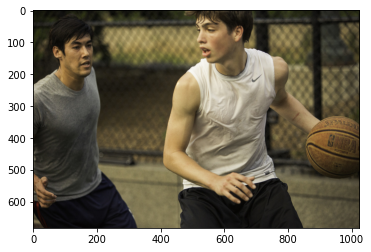

In [ ]:
img_path = test_generator.filepaths[second_class_right_cls_low_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

### 1.3. 2 примера неправильно классифицированных с высокой (с максимально возможной) вероятностью принадлежности к классу

In [ ]:
for i in range(len(arr) - 1, -1, -1):
    idx, prob, pred_label, true_label = arr[i]
    if pred_label == 1 and true_label == 0:
        first_class_wrong_cls_high_prob_idx = idx
        print(f"prob = {prob}, pred_class = {pred_label}, true_class = {labels[first_class_wrong_cls_high_prob_idx]}")
        break
for i in range(len(arr)):
    idx, prob, pred_label, true_label = arr[i]
    if pred_label == 0 and true_label == 1:
        second_class_wrong_cls_high_prob_idx = idx
        print(f"prob = {prob}, pred_class = {pred_label}, true_class = {labels[second_class_wrong_cls_high_prob_idx]}")
        break

prob = 0.9974714517593384, pred_class = 1, true_class = 0
prob = 6.139278411865234e-05, pred_class = 0, true_class = 1


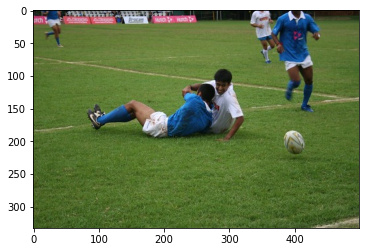

In [ ]:
img_path = test_generator.filepaths[first_class_wrong_cls_high_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

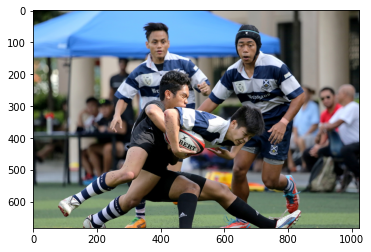

In [ ]:
img_path = test_generator.filepaths[second_class_wrong_cls_high_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

### 1.4. 2 примера неправильно классифицированных с низкой вероятностью принадлежности к классу

In [ ]:
for i in range(len(arr)):
    idx, prob, pred_label, true_label = arr[i]
    if pred_label == 1 and true_label == 0:
        first_class_wrong_cls_low_prob_idx = idx
        print(f"prob = {prob}, pred_class = {pred_label}, true_class = {labels[first_class_wrong_cls_low_prob_idx]}")
        break
for i in range(len(arr) - 1, -1, -1):
    idx, prob, pred_label, true_label = arr[i]
    if pred_label == 0 and true_label == 1:
        second_class_wrong_cls_low_prob_idx = idx
        print(f"prob = {prob}, pred_class = {pred_label}, true_class = {labels[second_class_wrong_cls_low_prob_idx]}")
        break

prob = 0.5269713401794434, pred_class = 1, true_class = 0
prob = 0.49922817945480347, pred_class = 0, true_class = 1


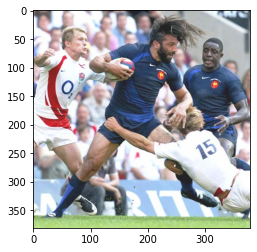

In [ ]:
img_path = test_generator.filepaths[first_class_wrong_cls_low_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

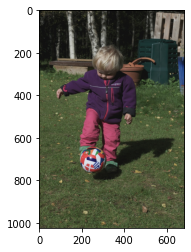

In [ ]:
img_path = test_generator.filepaths[second_class_wrong_cls_low_prob_idx]
img = image.load_img(img_path) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

## 2. Проанализировать примеры с помощью LIME и SHAP
1. Работают ли методы одинаково на всех 4 группах примеров?
2. Интуитивны ли результаты? Можете ли вы их интерпретировать? Почему?

**Выводы** 
* LIME показал себя довольно плохо. 
* Результаты SHAP получились не интерпретируемые. Ожидалось, что главным отличием между классами будет форма мяча (то есть то, на что обращает внимание человек)

### SHAP

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

In [ ]:
def shap_(picture_index):
  # load pre-trained model and choose two images to explain
  model = get_model('final_model_v2.h5')
  X,y = next(train_generator)
  to_explain, _ = test_generator[picture_index] #X[[19,21]]

  # load the ImageNet class names
  # url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
  # fname = shap.datasets.cache(url)
  # with open(fname) as f:
  #     class_names = json.load(f)

  class_names = {"1":["1","soccer"], "0":["0","regby"]}

  # explain how the input to the 7th layer of the model explains the top two classes
  def map2layer(x, layer):
      feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
      return K.get_session().run(model.layers[layer].input, feed_dict)
  e = shap.GradientExplainer(
      (model.layers[7].input, model.layers[-1].output),
      map2layer(X, 7),
      local_smoothing=0 # std dev of smoothing noise
  )
  shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

  # get the names for the classes
  index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

  # plot the explanations
  shap.image_plot(shap_values, to_explain, index_names)

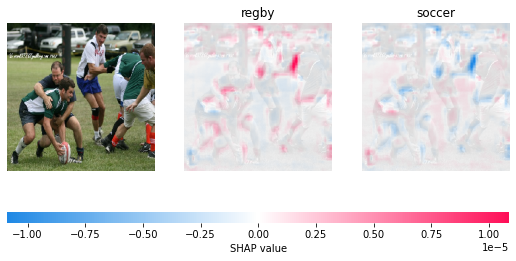

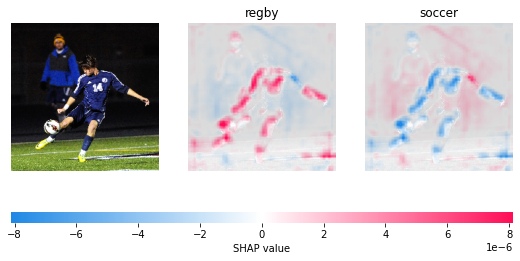

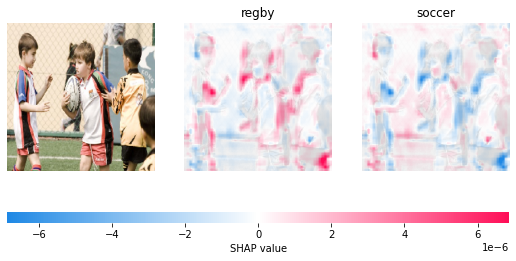

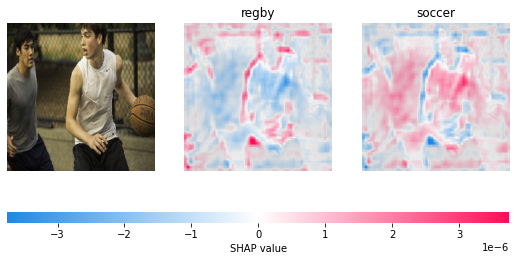

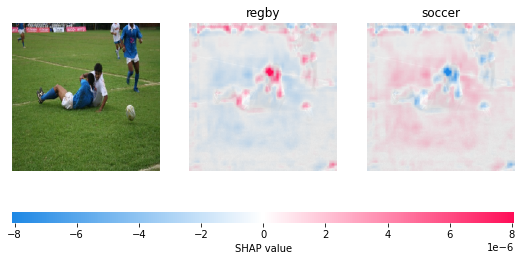

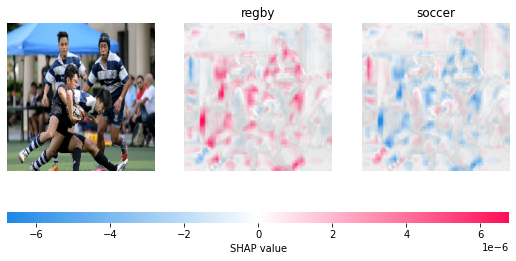

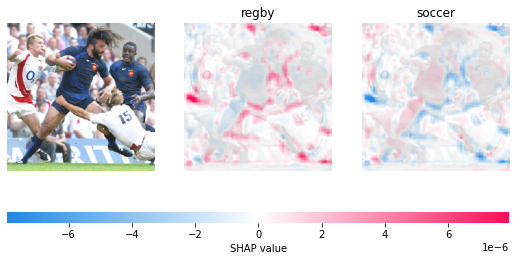

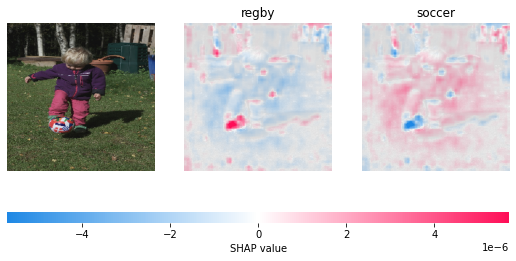

In [ ]:
indexes = [first_class_right_cls_high_prob_idx,
second_class_right_cls_high_prob_idx,
first_class_right_cls_low_prob_idx,
second_class_right_cls_low_prob_idx,
first_class_wrong_cls_high_prob_idx,
second_class_wrong_cls_high_prob_idx,
first_class_wrong_cls_low_prob_idx,
second_class_wrong_cls_low_prob_idx]
for index in indexes:
  shap_(index)

### LIME

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries


def transform_img_fn(img_path):
    out = []
    img = image.load_img(img_path, target_size=(inp_img_h, inp_img_w)) 
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor_out = img_tensor.copy() 
    preprocess_img_tensor = tf.keras.applications.vgg16.preprocess_input(img_tensor)
    out.append(preprocess_img_tensor)
    return np.vstack(out), img_tensor_out / 255.

def lime_(index):
  images, img_tensor = transform_img_fn(test_generator.filepaths[index])
  preds = model.predict(images)
      
  explainer = lime_image.LimeImageExplainer()
  explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
  temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
  return temp, mask, img_tensor

indexes = [
           first_class_right_cls_high_prob_idx,
           second_class_right_cls_high_prob_idx,
           first_class_right_cls_low_prob_idx,
           second_class_right_cls_low_prob_idx,
           first_class_wrong_cls_high_prob_idx,
           second_class_wrong_cls_high_prob_idx,
           first_class_wrong_cls_low_prob_idx,
           second_class_wrong_cls_low_prob_idx
]

fig = plt.figure(figsize=(70, 70))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(len(indexes), 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, index in zip(grid, indexes):
    # Iterating over the grid returns the Axes.
    temp, mask, img_tensor = lime_(index)
    ax.imshow(mark_boundaries(img_tensor[0], mask))

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3. Применить по одному методу из следующих групп: gradients, signals, attribution methods
1. Получили ли те же результаты для всех методов?  
2. Насколько они отличаются от того, что вы получили для LIME и SHAP?

__3.1. Получили ли те же результаты для всех методов?__  
- Используя библиотеку результаты двольно похожи. Используя метод, предложенный на лекции deconvNet отличается от Gradient и input * Gradient (более явно выражены границы объектов)  

__3.2. Насколько они отличаются от того, что вы получили для LIME и SHAP?__  
- В целом, результаты довольно похожи, разве что при использовании библиотеки `saliency` получилось больше значимых нейронов

In [ ]:
@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

@tf.custom_gradient
def deconvNet(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * dy
    return tf.nn.relu(x), grad

@tf.custom_gradient
def Grad(x):
    def grad(dy):
        return tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad


def func(idx, method, input=False):
  LAYER_NAME='block5_conv3'

  model = load_model("final_model_v2.h5")
  gb_model = tf.keras.models.Model(
      inputs = [model.inputs],    
      outputs = [model.get_layer(LAYER_NAME).output]
  )
  # and then select the layers having activations
  layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

  img = tf.keras.preprocessing.image.load_img(test_generator.filepaths[idx], target_size=(inp_img_h, inp_img_w))
  # Preprocess the image using vgg16 preprocess function
  img =  tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(img, axis=0)
  preprocessed_input = tf.keras.applications.vgg16.preprocess_input(x)

  for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = method
        
  with tf.GradientTape() as tape:
      inputs = tf.cast(preprocessed_input, tf.float32)
      tape.watch(inputs)
      outputs = gb_model(inputs)[0]
  grads = tape.gradient(outputs,inputs)[0]

  guided_back_prop = grads
  gb_viz = np.dstack((
              guided_back_prop[:, :, 0],
              guided_back_prop[:, :, 1],
              guided_back_prop[:, :, 2],
          )) 

  if input:
    gb_viz *= preprocessed_input[0] # gradient * input 
  gb_viz -= np.min(gb_viz)
  gb_viz /= gb_viz.max()
      
  plt.figure(figsize=(7, 7))
  imgplot = plt.imshow(gb_viz)
  plt.axis("off")
  plt.show()

In [ ]:
indexes = [first_class_right_cls_high_prob_idx,
second_class_right_cls_high_prob_idx,
first_class_right_cls_low_prob_idx,
second_class_right_cls_low_prob_idx,
first_class_wrong_cls_high_prob_idx,
second_class_wrong_cls_high_prob_idx,
first_class_wrong_cls_low_prob_idx,
second_class_wrong_cls_low_prob_idx]
for idx in indexes:
  func(idx, Grad, False)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for idx in indexes:
  func(idx, deconvNet, False)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for idx in indexes:
  func(idx, Grad, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import PIL.Image
from matplotlib import pylab as P

import saliency.core as saliency

In [ ]:
# Boilerplate methods.
def ShowImage(im, title='', ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im)
    P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
    if ax is None:
        P.figure()
    P.axis('off')

    P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
    P.title(title)

def ShowHeatMap(im, title, ax=None):
    if ax is None:
        P.figure()
    P.axis('off')
    P.imshow(im, cmap='inferno')
    P.title(title)

def LoadImage(file_path):
    im = PIL.Image.open(file_path)
    im = im.resize((224,224))
    im = np.asarray(im)
    return im

def PreprocessImage(im):
    im = tf.keras.applications.vgg16.preprocess_input(im)
    return im

In [ ]:
conv_layer = model.get_layer('block5_conv3')
m = tf.keras.models.Model([model.inputs], [conv_layer.output, model.output])

In [ ]:
class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            _, output_layer = m(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = m(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

In [ ]:
def get_greyscale_images(index):
    im_orig = LoadImage(test_generator.filepaths[index])
    im = PreprocessImage(im_orig)

    _, predictions = m(np.array([im]))
    prediction_class = np.argmax(predictions[0])
    call_model_args = {class_idx_str: prediction_class}

    print("Prediction class: " + str(prediction_class))
    # Construct the saliency object. This alone doesn't do anthing.
    gradient_saliency = saliency.GradientSaliency()
    integrated_gradients = saliency.IntegratedGradients()
    guided_backprop_gradients = saliency.GuidedIG()

    baseline = np.zeros(im.shape)


    # Compute the vanilla mask and the smoothed mask.
    vanilla_mask_3d = gradient_saliency.GetMask(im, call_model_function, call_model_args)
    # smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args)
    vanilla_integrated_gradients_mask_3d = integrated_gradients.GetMask(
      im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
    guided_backprop_gradients_mask_3d = guided_backprop_gradients.GetMask(
      im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, max_dist=1.0, fraction=0.5)



    # Call the visualization methods to convert the 3D tensors to 2D grayscale.
    vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)
    # smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)
    vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_integrated_gradients_mask_3d)
    guided_backprop_grayscale = saliency.VisualizeImageGrayscale(guided_backprop_gradients_mask_3d)

    # Set up matplot lib figures.
    ROWS = 2
    COLS = 2
    UPSCALE_FACTOR = 5
    P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

    # Render the saliency masks.
    ShowImage(im_orig, title='Original', ax=P.subplot(ROWS, COLS, 1))
    ShowGrayscaleImage(vanilla_mask_grayscale, title='Gradient', ax=P.subplot(ROWS, COLS, 2))
    # ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 3))
    ShowGrayscaleImage(vanilla_mask_grayscale, title='Integrated Gradients', ax=P.subplot(ROWS, COLS, 3))
    ShowGrayscaleImage(guided_backprop_grayscale, title='Guided Backpropagation', ax=P.subplot(ROWS, COLS, 4))

In [ ]:
indexes = [first_class_right_cls_high_prob_idx,
second_class_right_cls_high_prob_idx,
first_class_right_cls_low_prob_idx,
second_class_right_cls_low_prob_idx,
first_class_wrong_cls_high_prob_idx,
second_class_wrong_cls_high_prob_idx,
first_class_wrong_cls_low_prob_idx,
second_class_wrong_cls_low_prob_idx]
for index in indexes:
  get_greyscale_images(index)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
predictions

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0., 1.]], dtype=float32)>

## 4. Найти контрфактические примеры для всех 8 примеров

In [ ]:
# pip install alibi

In [ ]:
# importing the necessery modules
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
#from tensorflow.keras import models
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

import keras.backend as K

import alibi
from alibi.explainers import Counterfactual, CounterfactualProto

In [ ]:
# The problem with the above generators is that they return batches 
# (X,y), however, for autoencoders we need (X,X). Thus, we slightly
# fix them to get the desired output:
def fixed_generator(generator): # for batches
    for batch in generator:
        yield (batch[0], batch[0])
        
def next_generator(generator): # for one instance
    batch = next(generator)
    yield (batch[0], batch[0])

In [ ]:
# importing the trained model (that is needed to be studied)
model = load_model('final_model_v2.h5')

In [ ]:
# setting parameters
shape = (1, inp_img_h, inp_img_w, 3)
target_proba = 1.0
tol = 0.01 # want counterfactuals with p(class)>0.99
target_class = 'other' # any class other than the class of the image will be used
max_iter = 1000 # maximum number of interations to run the gradient descent for (inner loop)
lam_init = 1e-1 # initial regularization constant for the prediction part of the Wachter loss
max_lam_steps = 10 # number of loss optimization steps for each value of 𝜆; the multiplier of the distance loss term
learning_rate_init = 0.1 # initial learning rate for each outer loop of 𝜆
feature_range = (0,1)

### 1 first_class_right_cls_high_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = first_class_right_cls_high_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Counterfactual prediction: 1


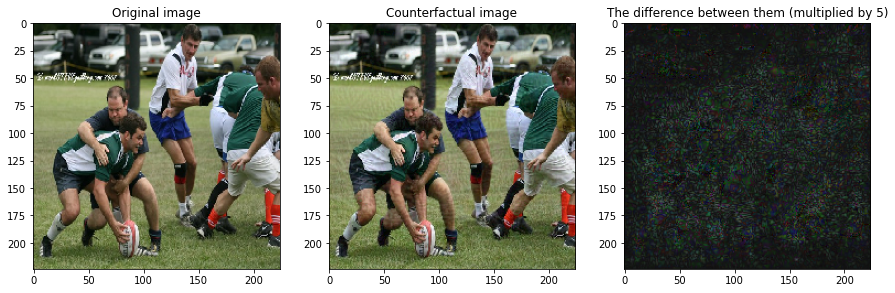

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(7*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title("The difference between them (multiplied by 5)");


### 2 second_class_right_cls_high_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = second_class_right_cls_high_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Counterfactual prediction: 0


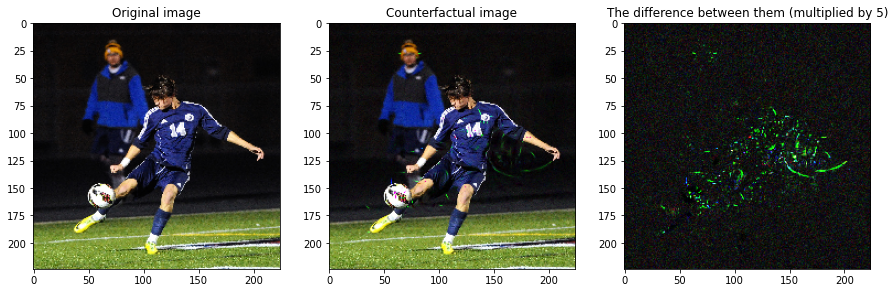

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(7*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title("The difference between them (multiplied by 5)");


### 3 first_class_right_cls_low_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = first_class_right_cls_low_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Counterfactual prediction: 1


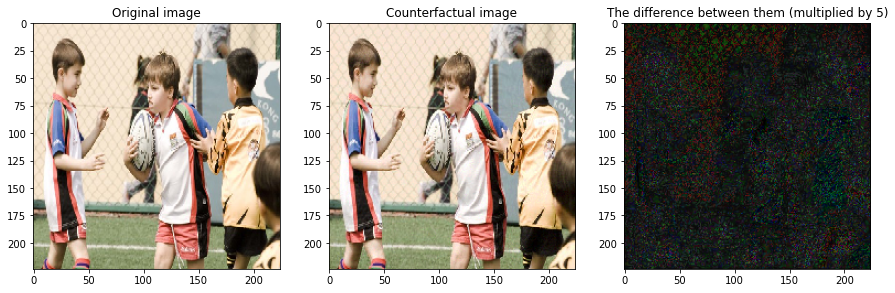

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(11*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title("The difference between them (multiplied by 5)");


### 4 second_class_right_cls_low_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = second_class_right_cls_low_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Counterfactual prediction: 0


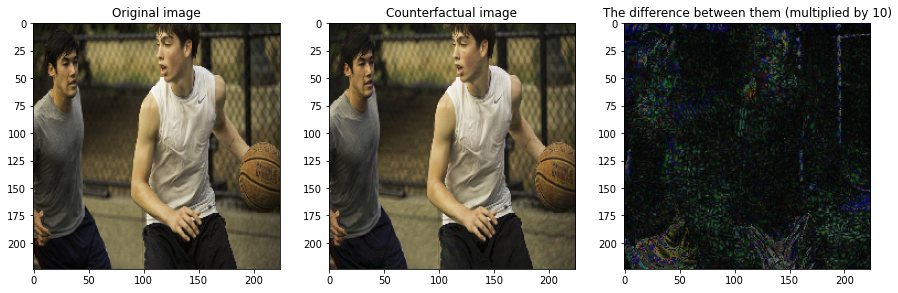

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))
mult = 10
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(mult*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title(f"The difference between them (multiplied by {mult})");


### 5 first_class_wrong_cls_high_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = first_class_wrong_cls_high_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Counterfactual prediction: 0


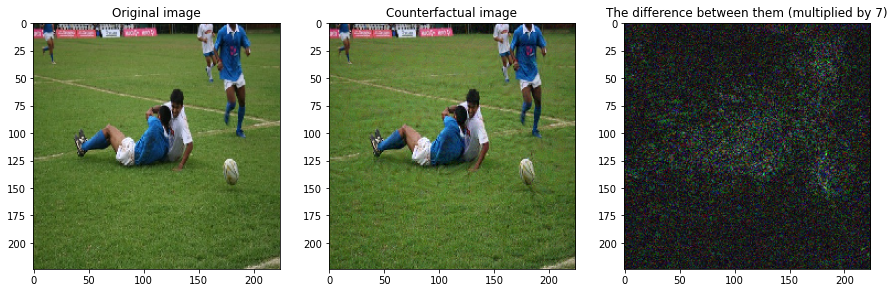

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))
mult = 7
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(mult*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title(f"The difference between them (multiplied by {mult})");

### 6 second_class_wrong_cls_high_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = second_class_wrong_cls_high_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Counterfactual prediction: 1


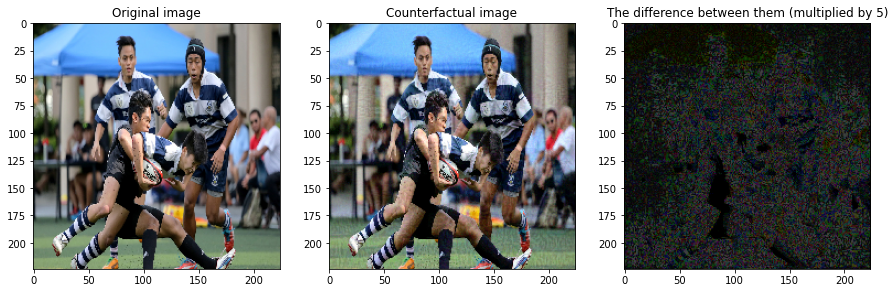

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))
mult = 5
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(mult*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title(f"The difference between them (multiplied by {mult})");

### 7 first_class_wrong_cls_low_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = first_class_wrong_cls_low_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Counterfactual prediction: 0


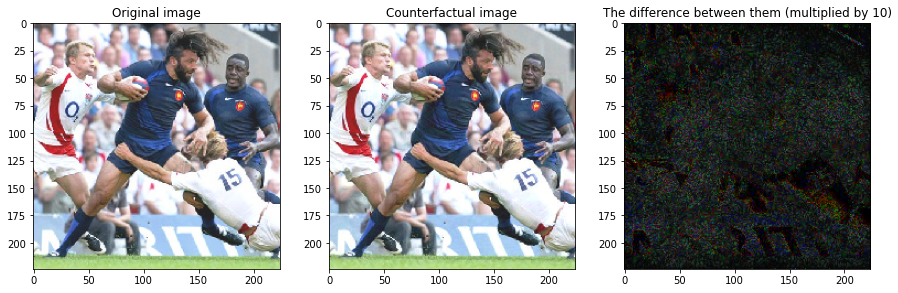

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))
mult = 10
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(mult*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title(f"The difference between them (multiplied by {mult})");

### 8 second_class_wrong_cls_low_prob_idx

In [ ]:
# we select an arbitrary image to be explained
id_test = second_class_wrong_cls_low_prob_idx

x_test, _ = test_generator[id_test]
y_test = test_generator.classes[id_test]

In [ ]:
tf.compat.v1.disable_eager_execution()
cf = Counterfactual(model, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

In [ ]:
x_test, _ = test_generator[id_test]
explanation = cf.explain(x_test)

Counterfactual prediction: 1


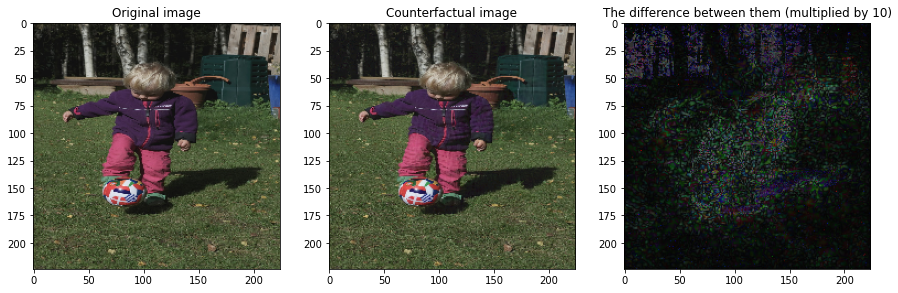

In [ ]:
print('Counterfactual prediction: {}'.format(explanation.cf['class']))
mult = 10
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_test[0])
axs[1].imshow(explanation.cf['X'][0])
axs[2].imshow(mult*np.abs(x_test[0]-explanation.cf['X'][0]))

axs[0].set_title("Original image")
axs[1].set_title("Counterfactual image")
axs[2].set_title(f"The difference between them (multiplied by {mult})");

# Вывод
__Какие из методов в вашем случае показали наиболее интуитивно достоверные результаты?__  
- LIME показал себя плохо. 
- Результаты SHAP не интерпретируемые, но по сравнению с LIME выделяются какие-то осмысленные области (люди и т.д.). 
- Довольно сложно выделить отличия между SHAP и gradients, signals, attribution методами.  
- В случае с контрфактическими примерами получился довольно объяснимый результат: картинки с большой вероятностью принадлежности класса (не зависимо от того, правильно классифицирован объект или нет) нуждаются в большем шуме, который уже становится заметен глазу. В случае с объектами, имеющих небольшую вероятность принадлежности классу, изменения не заметны.